<a href="https://colab.research.google.com/github/byeori-jang/Deep-learning/blob/main/%082025-10-28/RNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0428
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0065
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0040
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0054
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0048
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0061
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0048
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0047
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0054
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0043
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0045
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0046
Epoch 14/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0055
Epoch 15/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0052
Epoch 16/50
32/32 ━━━━━━━

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
📊 Test MSE: 0.010478


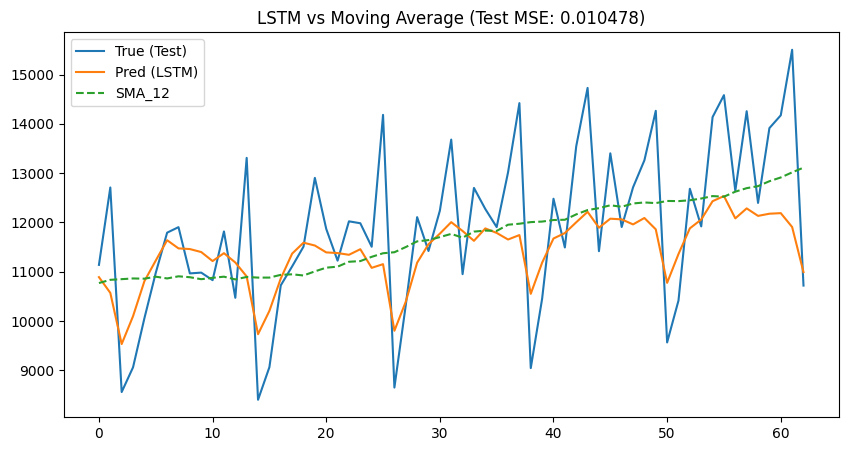

In [10]:
import numpy as np, pandas as pd, tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 1. 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Alcohol_Sales.csv')
data = df['S4248SM144NCEN'].values.reshape(-1,1)

# 2. 정규화
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# 3. 시퀀스 생성
window = 12   # 최근 12개월 → 다음달 예측
X, y = [], []
for i in range(len(data)-window):
    X.append(data[i:i+window])
    y.append(data[i+window])
X, y = np.array(X), np.array(y)

# 4. Train/Test 분리 (80:20)
split = int(len(X) * 0.8)
X_train, y_train = X[:split], y[:split]
X_test,  y_test  = X[split:], y[split:]

# 5. LSTM 모델
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(window,1)),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# 6. 학습
model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1)

# 7. 예측
pred = model.predict(X_test)

# 8. MSE 계산
mse = mean_squared_error(y_test, pred)
print(f"📊 Test MSE: {mse:.6f}")

# 9. 이동평균(MA) 계산 — 원래 단위로 비교할 때 보기 좋게
df['SMA_12'] = df['S4248SM144NCEN'].rolling(window=12, min_periods=1).mean()

# 10. 결과 시각화
plt.figure(figsize=(10,5))
plt.plot(scaler.inverse_transform(y_test), label='True (Test)')
plt.plot(scaler.inverse_transform(pred), label='Pred (LSTM)')
plt.plot(df['SMA_12'].iloc[-len(y_test):].values, label='SMA_12', linestyle='--')
plt.legend()
plt.title(f"LSTM vs Moving Average (Test MSE: {mse:.6f})")
plt.show()
